# <center>White Wine Price Prediction Using Machine Learning

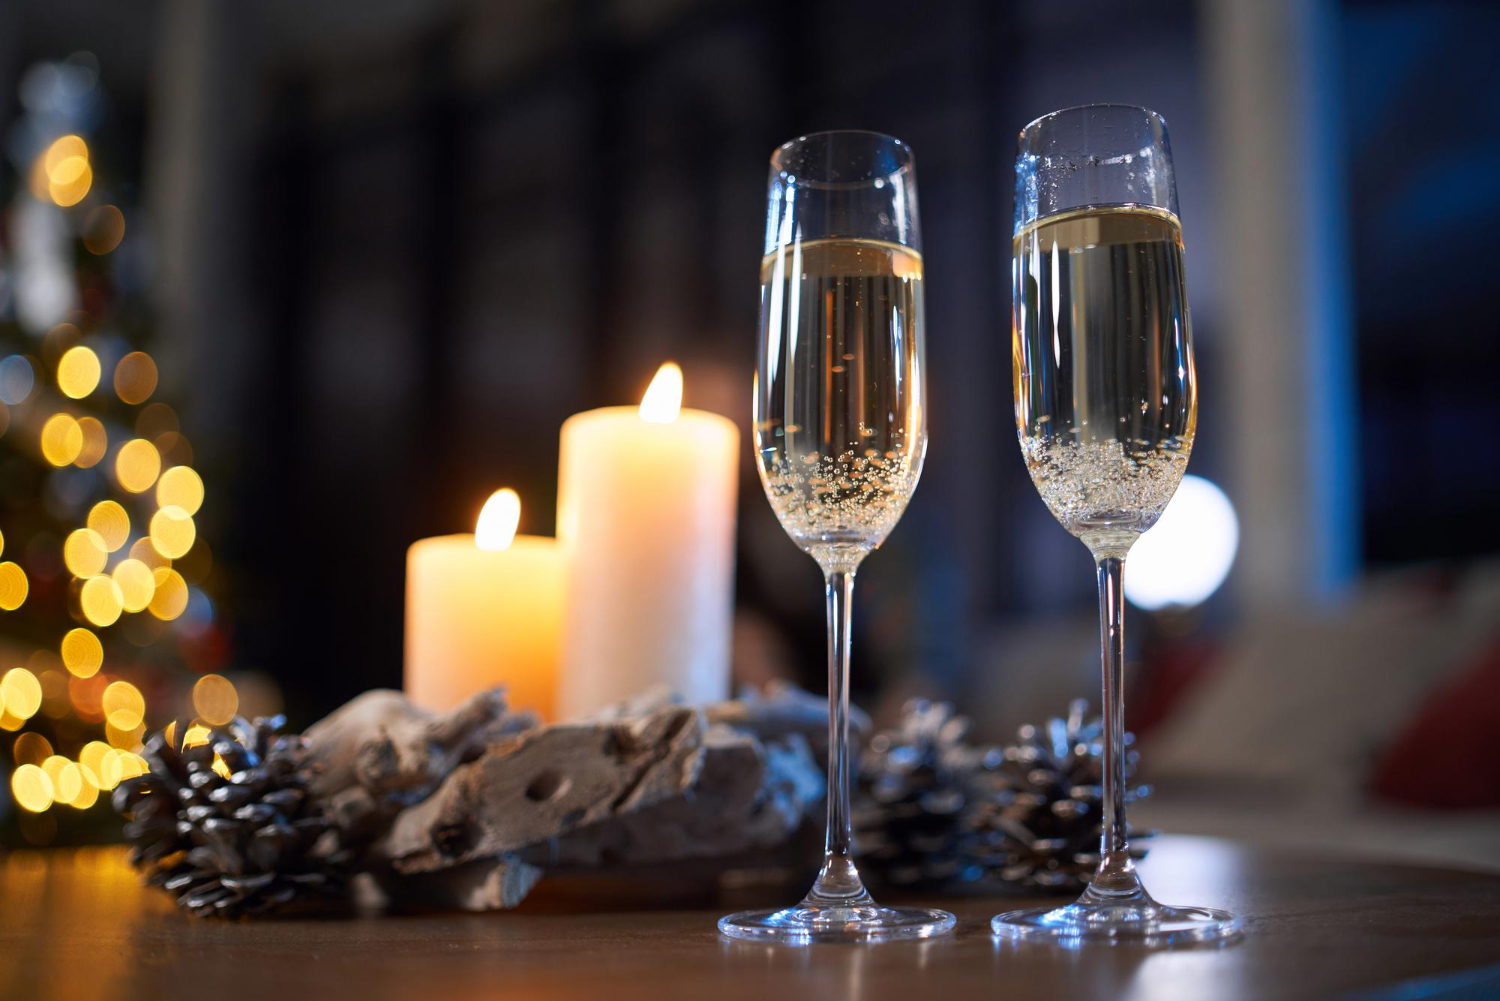

<p>I am using White Wine dataset which is a tidy data set.In this project we processing and exploring a large amount of data on White wine. This data set contains 4,594 white wines with 14 variables.
    Using this dataset we can predict the price or rating of white wines based on their region, winery, and vintage. 
</p>

##### You can download the dataset from the link given below
##### https://www.kaggle.com/code/zhenyulin/white-wine-region-winery-vintage-price-rating

#### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import LinearSVR
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

#### Loading the dataset

In [2]:
data = pd.read_csv("./white-wine-price.csv")
data

,FullName,Winery,WineName,Year,Region,RegionalVariety,VintageRating,VintageRatingCount,WineRating,WineRatingCount,VintagePrice,WinePrice,VintageRatingPriceRatio,WineRatingPriceRatio
0,Domaine Coche-Dury Meursault Les Rougeots 2001,Domaine Coche-Dury,Meursault Les Rougeots,2001,Burgundy,Côte de Beaune White,4.9,25,4.7,755,806.580,806.580,0.006075,0.005827
1,Joseph Drouhin Montrachet Grand Cru Marquis de...,Joseph Drouhin,Montrachet Grand Cru Marquis de Laguiche,2015,Burgundy,Côte de Beaune White,4.8,46,4.6,1191,680.000,680.000,0.007059,0.006765
2,Marcassin Marcassin Vineyard Chardonnay 2013,Marcassin,Marcassin Vineyard Chardonnay,2013,Californian,Chardonnay,4.8,28,4.6,884,448.000,448.000,0.010714,0.010268
3,M. Chapoutier Ermitage Le Méal Blanc 2006,M. Chapoutier,Ermitage Le Méal Blanc,2006,Northern Rhône,White,4.8,31,4.5,414,164.675,164.675,0.029148,0.027327
4,Domaine Coche-Dury Corton-Charlemagne Grand Cr...,Domaine Coche-Dury,Corton-Charlemagne Grand Cru,2007,Burgundy,Côte de Beaune White,4.8,35,4.7,454,3478.360,3478.360,0.001380,0.001351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4589,Domaine du Tunnel Saint-Péray Roussanne 2018,Domaine du Tunnel,Saint-Péray Roussanne,2018,Northern Rhône,Saint-Péray,4.0,25,4.0,543,23.530,23.530,0.169996,0.169996
4590,Brown Brothers Patricia Chardonnay 2010,Brown Brothers,Patricia Chardonnay,2010,Australian,Chardonnay,4.0,25,4.0,194,29.480,29.480,0.135685,0.135685
4591,Litmus Wines White Pinot 2015,Litmus Wines,White Pinot,2015,NaN,NaN,4.0,25,4.0,91,24.500,24.500,0.163265,0.163265
4592,Rollin Père et Fils Pernand-Vergelesses 'Les C...,Rollin Père et Fils,Pernand-Vergelesses 'Les Cloux',2017,Burgundy,Côte de Beaune White,4.0,25,4.1,330,20.160,20.160,0.198413,0.203373


#### Data Exploration

In [3]:
data.head()

,FullName,Winery,WineName,Year,Region,RegionalVariety,VintageRating,VintageRatingCount,WineRating,WineRatingCount,VintagePrice,WinePrice,VintageRatingPriceRatio,WineRatingPriceRatio
0,Domaine Coche-Dury Meursault Les Rougeots 2001,Domaine Coche-Dury,Meursault Les Rougeots,2001,Burgundy,Côte de Beaune White,4.9,25,4.7,755,806.580,806.580,0.006075,0.005827
1,Joseph Drouhin Montrachet Grand Cru Marquis de...,Joseph Drouhin,Montrachet Grand Cru Marquis de Laguiche,2015,Burgundy,Côte de Beaune White,4.8,46,4.6,1191,680.000,680.000,0.007059,0.006765
2,Marcassin Marcassin Vineyard Chardonnay 2013,Marcassin,Marcassin Vineyard Chardonnay,2013,Californian,Chardonnay,4.8,28,4.6,884,448.000,448.000,0.010714,0.010268
3,M. Chapoutier Ermitage Le Méal Blanc 2006,M. Chapoutier,Ermitage Le Méal Blanc,2006,Northern Rhône,White,4.8,31,4.5,414,164.675,164.675,0.029148,0.027327
4,Domaine Coche-Dury Corton-Charlemagne Grand Cr...,Domaine Coche-Dury,Corton-Charlemagne Grand Cru,2007,Burgundy,Côte de Beaune White,4.8,35,4.7,454,3478.360,3478.360,0.001380,0.001351


In [4]:
data.tail()

,FullName,Winery,WineName,Year,Region,RegionalVariety,VintageRating,VintageRatingCount,WineRating,WineRatingCount,VintagePrice,WinePrice,VintageRatingPriceRatio,WineRatingPriceRatio
4589,Domaine du Tunnel Saint-Péray Roussanne 2018,Domaine du Tunnel,Saint-Péray Roussanne,2018,Northern Rhône,Saint-Péray,4.0,25,4.0,543,23.53,23.53,0.169996,0.169996
4590,Brown Brothers Patricia Chardonnay 2010,Brown Brothers,Patricia Chardonnay,2010,Australian,Chardonnay,4.0,25,4.0,194,29.48,29.48,0.135685,0.135685
4591,Litmus Wines White Pinot 2015,Litmus Wines,White Pinot,2015,NaN,NaN,4.0,25,4.0,91,24.50,24.50,0.163265,0.163265
4592,Rollin Père et Fils Pernand-Vergelesses 'Les C...,Rollin Père et Fils,Pernand-Vergelesses 'Les Cloux',2017,Burgundy,Côte de Beaune White,4.0,25,4.1,330,20.16,20.16,0.198413,0.203373
4593,Suertes del Marqués Vidonia 2018,Suertes del Marqués,Vidonia,2018,NaN,NaN,4.0,25,3.9,832,21.34,21.34,0.187441,0.182755


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4594 entries, 0 to 4593
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   FullName                 4594 non-null   object 
 1   Winery                   4594 non-null   object 
 2   WineName                 4594 non-null   object 
 3   Year                     4594 non-null   object 
 4   Region                   4217 non-null   object 
 5   RegionalVariety          4217 non-null   object 
 6   VintageRating            4594 non-null   float64
 7   VintageRatingCount       4594 non-null   int64  
 8   WineRating               4594 non-null   float64
 9   WineRatingCount          4594 non-null   int64  
 10  VintagePrice             4594 non-null   float64
 11  WinePrice                4594 non-null   float64
 12  VintageRatingPriceRatio  4594 non-null   float64
 13  WineRatingPriceRatio     4594 non-null   float64
dtypes: float64(6), int64(2),

In [6]:
data.drop(columns="FullName",inplace=True)

In [7]:
data.describe()

,VintageRating,VintageRatingCount,WineRating,WineRatingCount,VintagePrice,WinePrice,VintageRatingPriceRatio,WineRatingPriceRatio
count,4594.000000,4594.000000,4594.000000,4594.000000,4594.000000,4594.000000,4594.000000,4594.000000
mean,4.208272,131.526774,4.159599,1255.237048,103.875294,103.875294,0.101727,0.100233
std,0.171763,233.877452,0.175609,1984.197756,437.853292,437.853292,0.054872,0.053590
min,3.900000,25.000000,3.500000,28.000000,10.500000,10.500000,0.000512,0.000512
25%,4.100000,40.000000,4.000000,368.000000,28.480000,28.480000,0.057539,0.057333
50%,4.200000,69.000000,4.100000,710.000000,41.670000,41.670000,0.100024,0.098868
75%,4.300000,138.000000,4.300000,1425.500000,74.677500,74.677500,0.144828,0.142809
max,4.900000,6883.000000,4.700000,37863.000000,9180.000000,9180.000000,0.380952,0.361905


In [8]:
data.shape

(4594, 13)

###### Checking the Null percentage

In [9]:
data.isnull().mean()*100

Winery                     0.000000
WineName                   0.000000
Year                       0.000000
Region                     8.206356
RegionalVariety            8.206356
VintageRating              0.000000
VintageRatingCount         0.000000
WineRating                 0.000000
WineRatingCount            0.000000
VintagePrice               0.000000
WinePrice                  0.000000
VintageRatingPriceRatio    0.000000
WineRatingPriceRatio       0.000000
dtype: float64

In [10]:
data.dropna(inplace=True)

#### Checking the Duplicate values

In [11]:
data.duplicated().sum()

0

# Exploratory Data Analysis

### Univariate analysis

##### Histogram

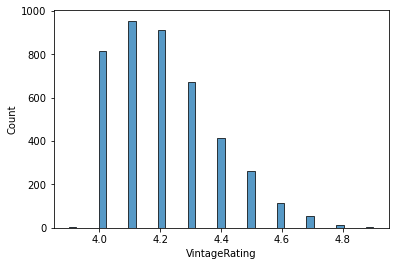

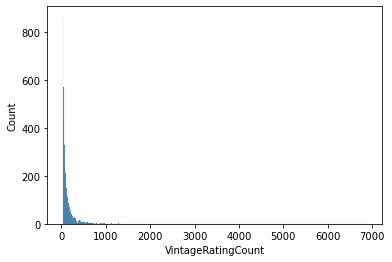

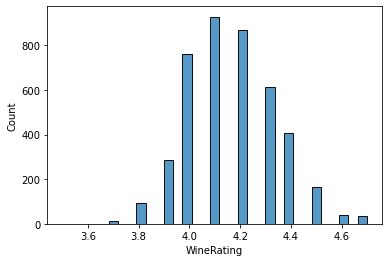

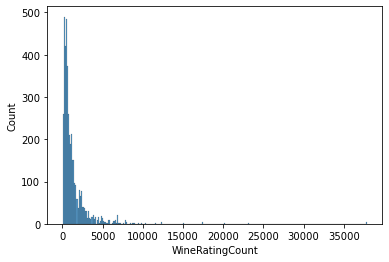

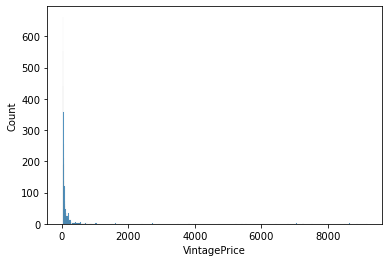

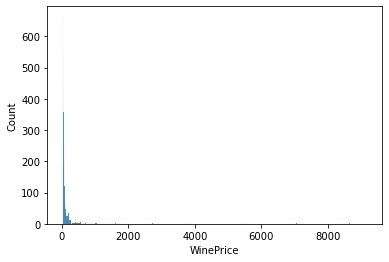

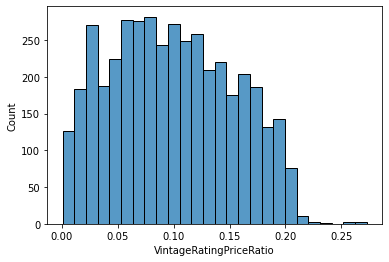

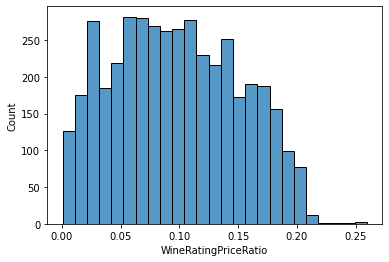

In [12]:
for i in data.columns:
    if data[i].dtype != "object":
        sns.histplot(x=data[i])
        plt.show()

##### KDE Plot

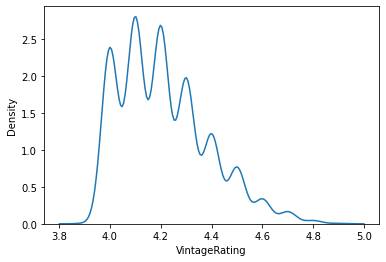

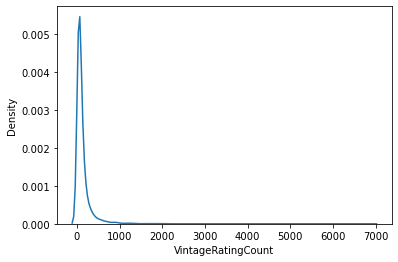

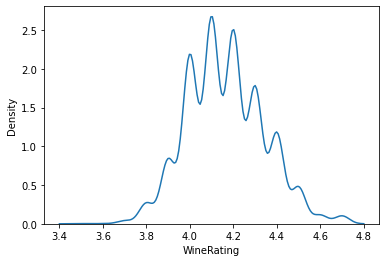

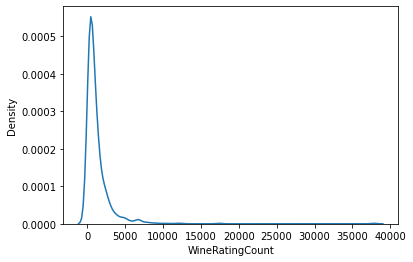

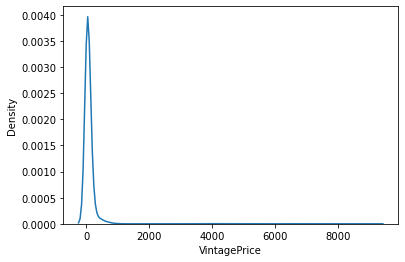

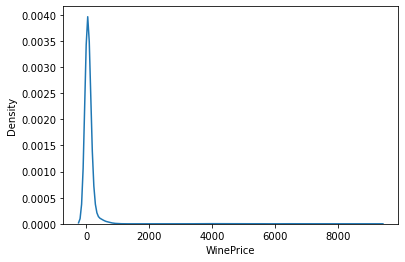

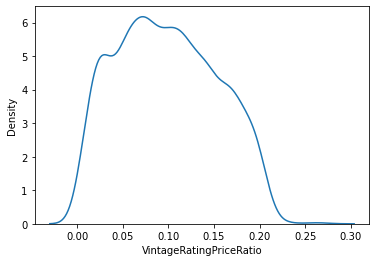

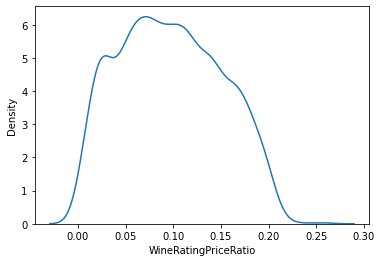

In [13]:
for i in data.columns:
    if data[i].dtype !="object":
        sns.kdeplot(x=data[i])
        plt.show()

#### Box plot

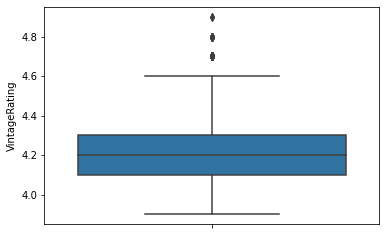

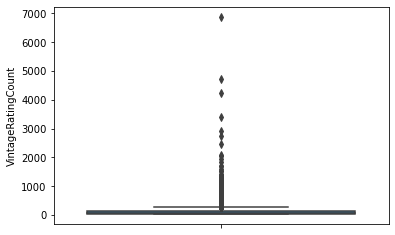

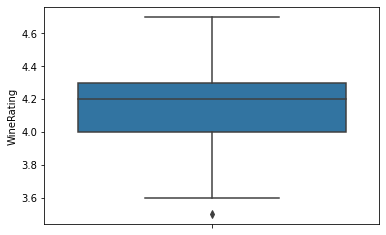

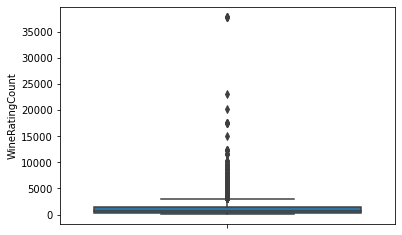

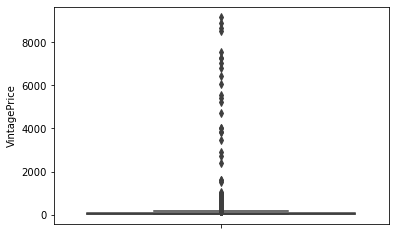

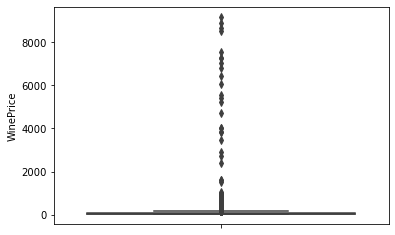

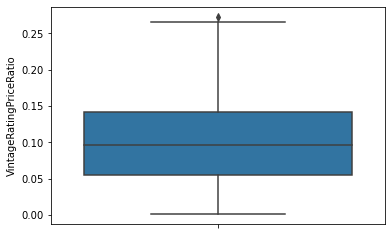

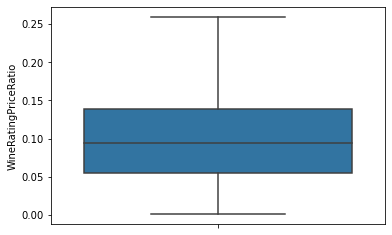

In [14]:
for i in data.columns:
    if data[i].dtype !="object":
        sns.boxplot(y=data[i])
        plt.show()

##### Outliers are present , so we have to treat the outliers

In [29]:
def outlier_limit(col):
    Q3,Q1 = np.nanpercentile(col,[75,25])
    IQR = Q3 - Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*IQR
    return UL,LL

In [30]:
for column in data.columns:
    if data[column].dtype != "object":
        UL,LL = outlier_limit(data[column])
        data[column]=np.where((data[column]>UL) | (data[column]<LL),np.nan,data[column])

##### After the Outlier treatment  drop the null values

In [31]:
data.dropna(inplace=True)

##### Now again plot the boxplot

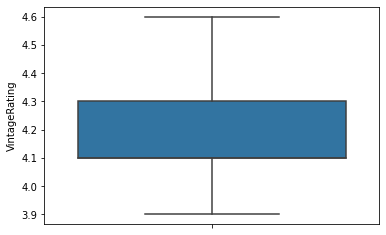

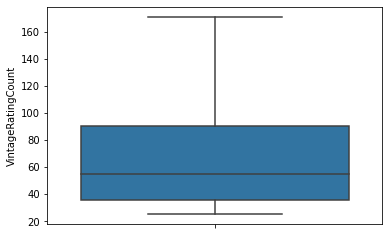

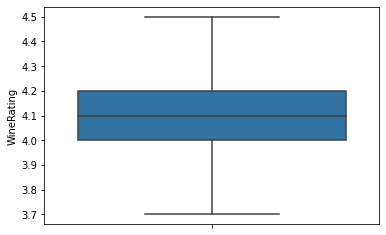

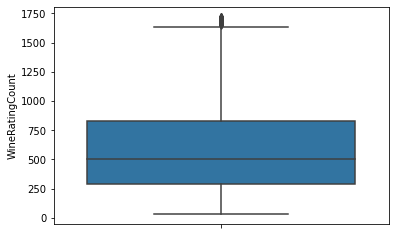

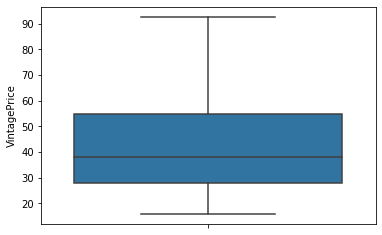

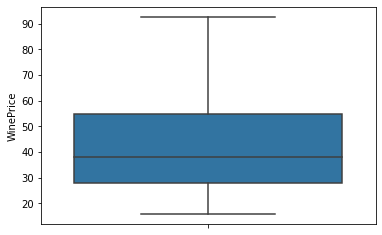

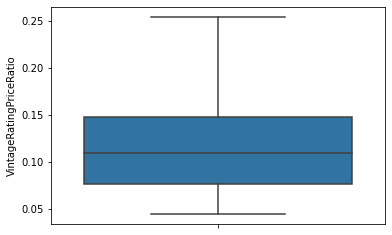

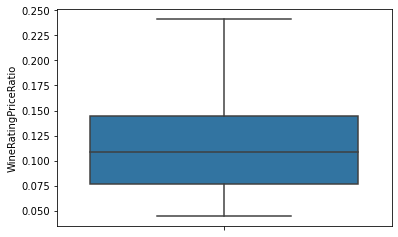

In [32]:
for i in data.columns:
    if data[i].dtype != "object":
        sns.boxplot(y=data[i])
        plt.show()

### Multivariate Analysis

###### Bar Chart


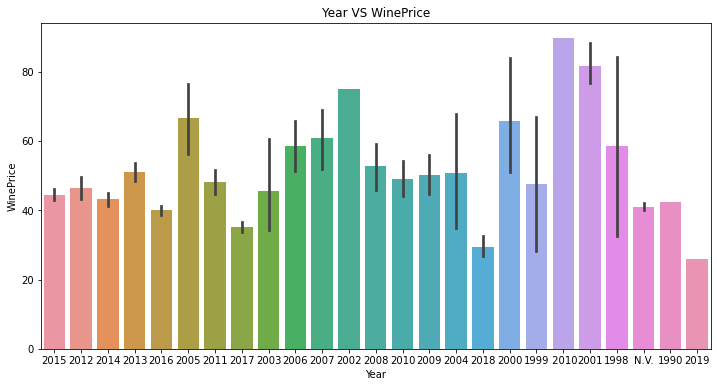

In [33]:
plt.figure(figsize=(12,6))
plt.title('Year VS WinePrice')
sns.barplot(x= 'Year', y= 'WinePrice', data=data);

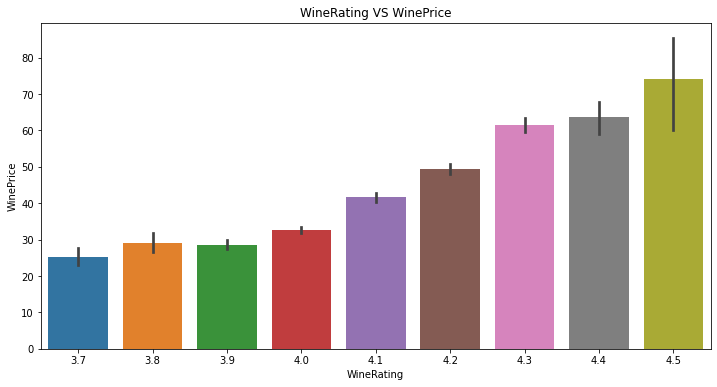

In [34]:
plt.figure(figsize=(12,6))
plt.title('WineRating VS WinePrice')
sns.barplot(x= 'WineRating', y= 'WinePrice', data=data);

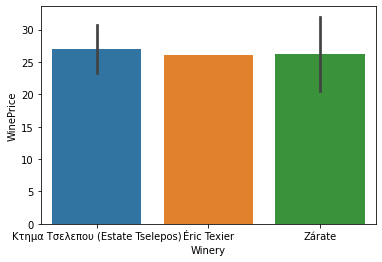

In [35]:
sns.barplot(x="Winery",y="WinePrice",data=data.sort_values(by="Winery",ascending=False)[:5]);

##### Scatter Plot

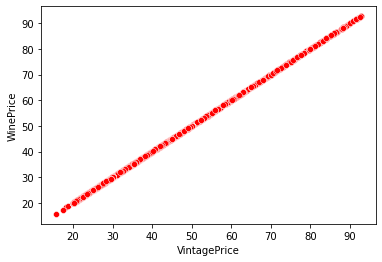

In [36]:
sns.scatterplot(data=data,x="VintagePrice",y="WinePrice",color="Red");

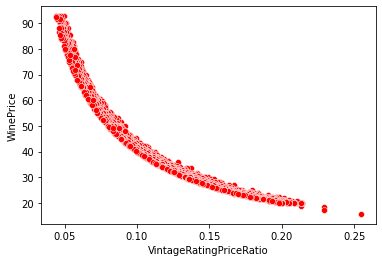

In [37]:
sns.scatterplot(data=data,x="VintageRatingPriceRatio",y="WinePrice",color="Red");

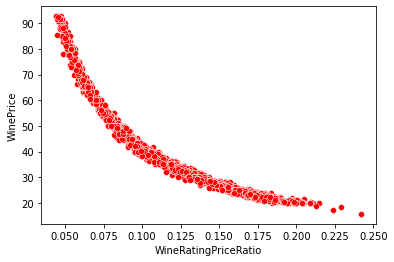

In [38]:
sns.scatterplot(data=data,x="WineRatingPriceRatio",y="WinePrice",color="Red");

###### Pie Chart

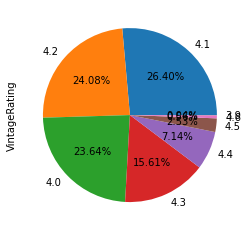

In [40]:
data.VintageRating.value_counts().plot.pie(autopct='%1.2f%%');

###### Line Chart

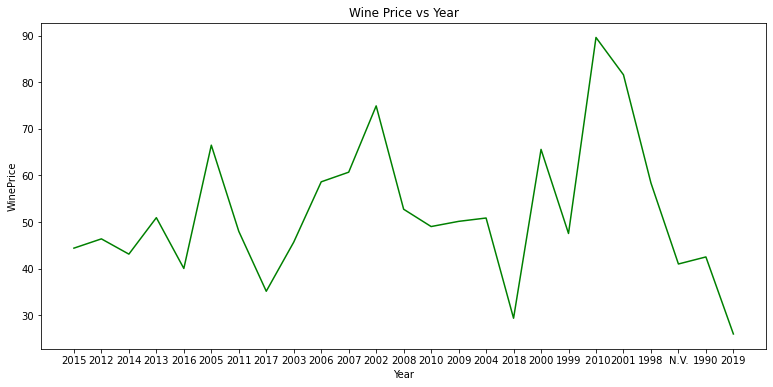

In [53]:
plt.figure(figsize=(13,6))
sns.lineplot(data=data,x="Year",y="WinePrice",color="Green",ci=None);
plt.title("Wine Price vs Year");

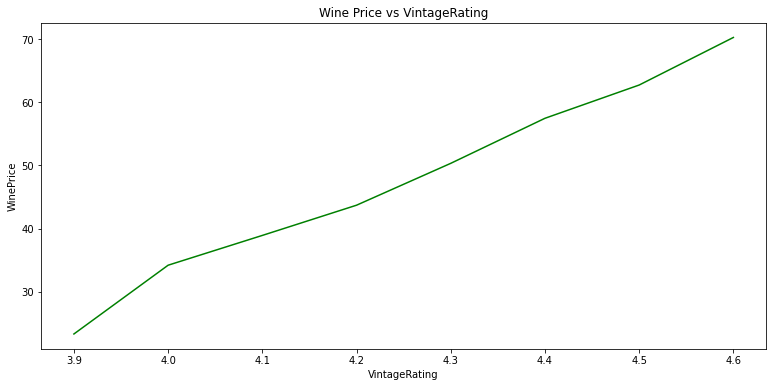

In [54]:
plt.figure(figsize=(13,6))
sns.lineplot(data=data,x="VintageRating",y="WinePrice",color="Green",ci=None);
plt.title("Wine Price vs VintageRating");

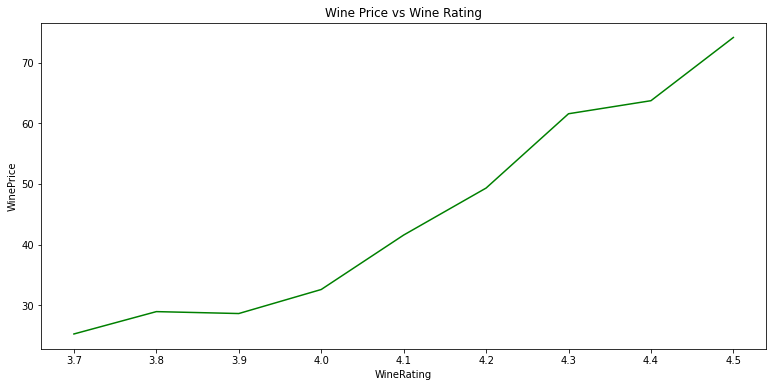

In [56]:
plt.figure(figsize=(13,6))
sns.lineplot(data=data,x="WineRating",y="WinePrice",color="Green",ci=None);
plt.title("Wine Price vs Wine Rating");

##### Pair Plot

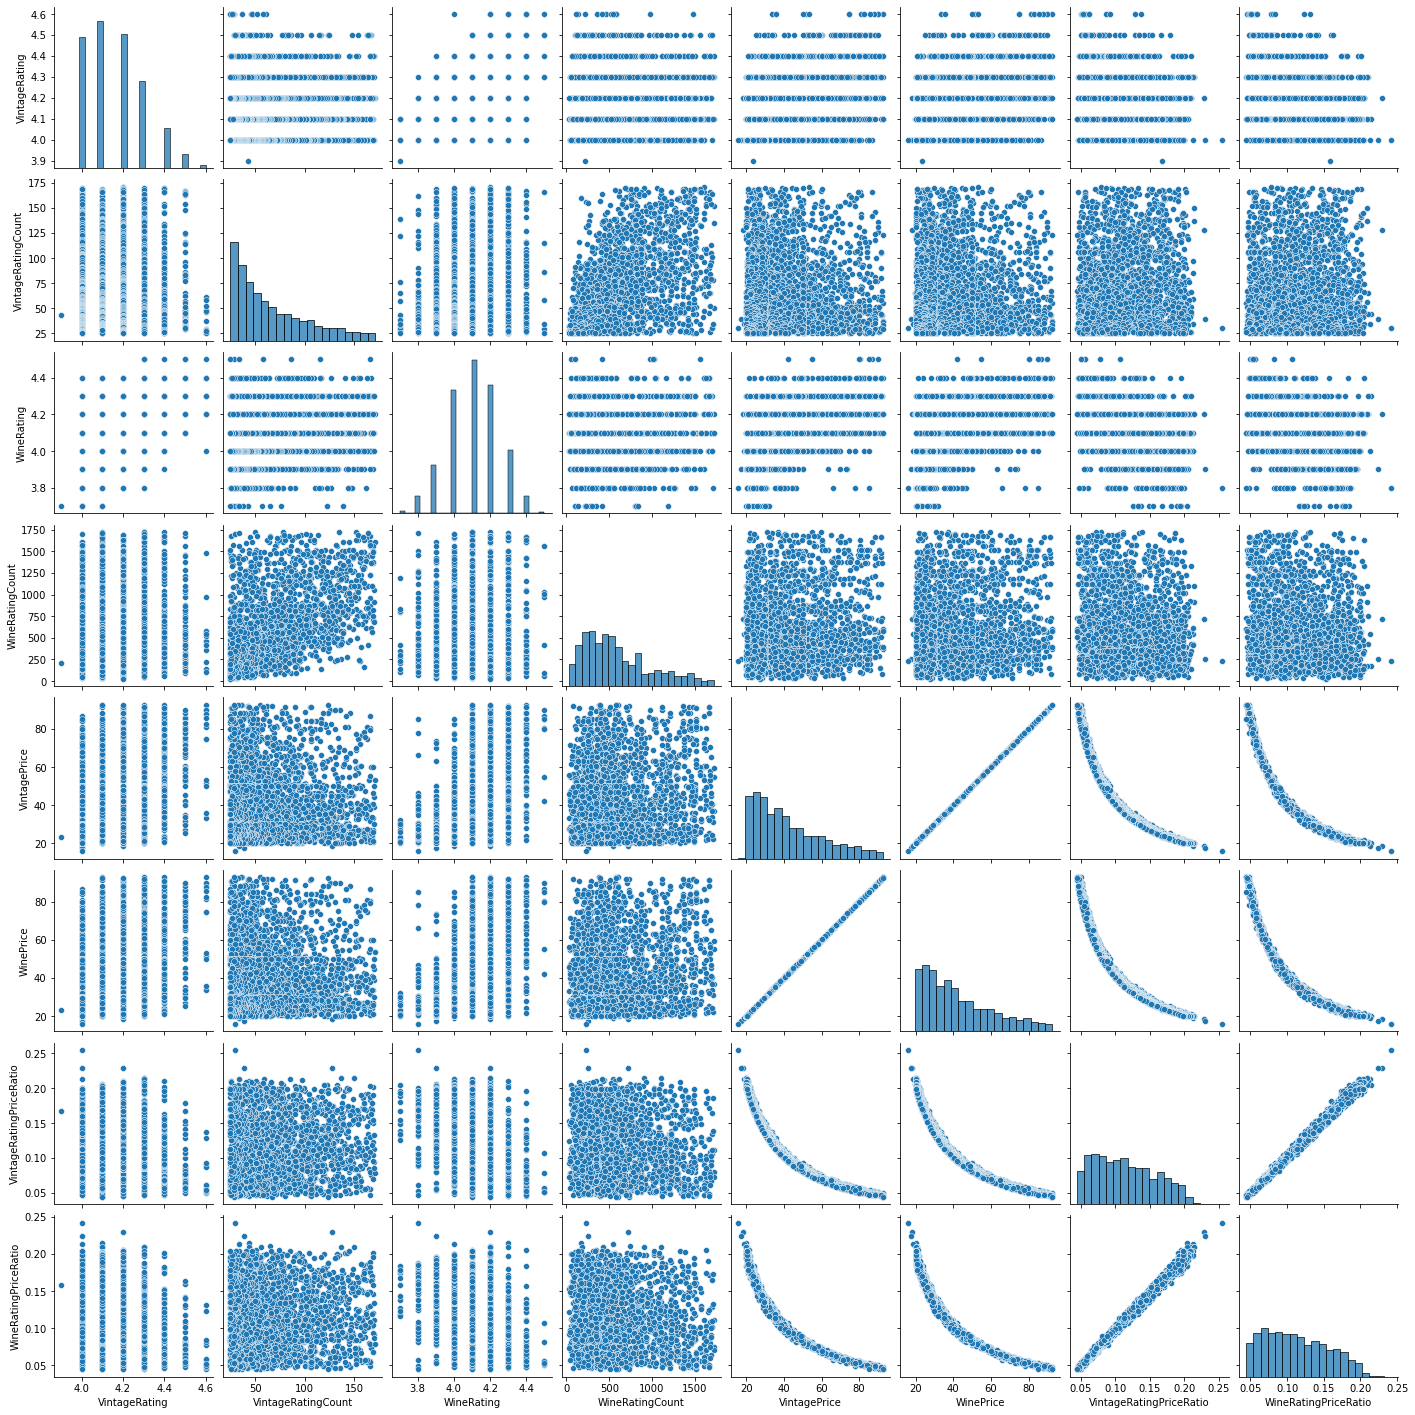

In [61]:
sns.pairplot(data);

#### perform Label Encoding to convert the categorical variables

In [62]:
le = LabelEncoder()

In [63]:
data["Winery"] = le.fit_transform(data["Winery"])
data["WineName"] = le.fit_transform(data["WineName"])
data["Year"] = le.fit_transform(data["Year"])
data["Region"] = le.fit_transform(data["Region"])
data["RegionalVariety"] = le.fit_transform(data["RegionalVariety"])

##### Check the correlation with the target variable "Price" 

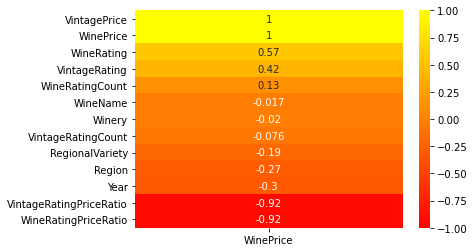

In [64]:
sns.heatmap(data.corr()[["WinePrice"]].sort_values(by="WinePrice",ascending=False),vmin=-1,vmax=1,annot=True,cmap="autumn");

#### Take the only columns which have good correlation with the target variable "Price"

In [65]:
x = data[["VintagePrice","WineRating","VintageRating","WineRatingCount"]].values
y = data[["WinePrice"]].values

###### Feature Scaling

In [66]:
sc = StandardScaler()

In [67]:
x = sc.fit_transform(x)

##### Model Building

In [68]:
models ={
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [69]:
for name,model in models.items():
    scores = cross_val_score(model,x,y,scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("Cross validation model : {} ".format(name))
    rmse = np.sqrt(-scores)
    rmse_avg = np.mean(rmse)
    print("Average RMSE : ",rmse_avg)
    print("*"*100)

Cross validation model : LinearRegression 
Average RMSE :  2.6241591986999677e-14
****************************************************************************************************
Cross validation model : Ridge 
Average RMSE :  0.011113586281835185
****************************************************************************************************
Cross validation model : AdaBoostRegressor 
Average RMSE :  1.323165018116922
****************************************************************************************************
Cross validation model : GradientBoostingRegressor 
Average RMSE :  0.14163518123523341
****************************************************************************************************
Cross validation model : LinearSVR 
Average RMSE :  8.979607692096713e-13
****************************************************************************************************
Cross validation model : DecisionTreeRegressor 
Average RMSE :  0.07671009155703837
********************

#### Since the Ridge has minimum rmse value, select the Ridge Model

In [70]:
model = Ridge()

##### Split the datase into training and testing data

In [71]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=0)

###### Fit the model with the training data

In [72]:
model.fit(x_train,y_train)

Ridge()

###### We can check the efficiency of the model

In [73]:
training_score = model.score(x_train,y_train)*100
testing_score = model.score(x_test,y_test)*100
R2_score = r2_score(y_test,model.predict(x_test))*100
mae = mean_absolute_error(y_test,model.predict(x_test))
mse = mean_squared_error(y_test,model.predict(x_test))
rmse = np.sqrt(mse)
print("r2score: ",R2_score)
print("training_score: ",training_score)
print("testing_score: ",testing_score)
print("mae: ",mae)
print("mse: ",mse)
print("rmse: ",rmse)

r2score:  99.99996127861239
training_score:  99.99996212628328
testing_score:  99.99996127861239
mae:  0.009109463502140184
mse:  0.00012977634300298676
rmse:  0.01139194202069984


###### Predicting values using the model

In [74]:
y_pred=model.predict(x)

###### After predicting we can compare it with the actual value

In [75]:
OUTPUT = pd.DataFrame(zip(y,y_pred),columns=("ACTUAL","PREDICTED"),dtype="float")
OUTPUT.head()

,ACTUAL,PREDICTED
0,67.165,67.153303
1,61.500,61.484947
2,86.000,85.981687
3,88.220,88.195125
4,55.000,55.006844


###### Scatter Plot

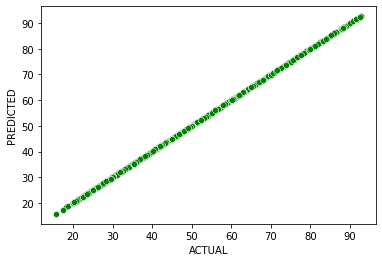

In [76]:
sns.scatterplot(data=OUTPUT,x="ACTUAL",y="PREDICTED",color="Green");

##### We can Check the score of the model

In [77]:
model.score(x,y)*100

99.99996195700312